In [1]:
from datetime import datetime
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.models import GeoJSONDataSource, Patches, LinearColorMapper, ColorBar
from bokeh.palettes import Greens9
from bokeh.plotting import figure
from bokeh.io import show, output_notebook

from data import get_merged_data, get_geo_data, DATA_PATH

import warnings
warnings.filterwarnings('ignore')

output_notebook()

Loading BokehJS ...

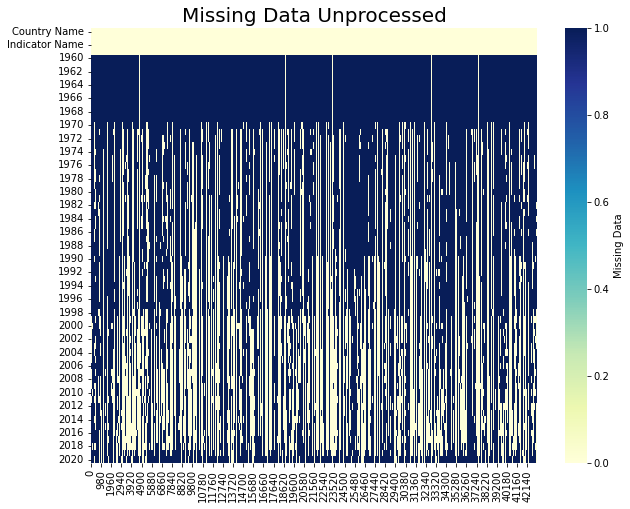

In [2]:
df = pd.read_csv(DATA_PATH / 'world_bank' / 'API_4_DS2_en_csv_v2_3160069.csv', skiprows=4)
df = df.drop(columns=['Unnamed: 65'])
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Missing Data Unprocessed', size=20)
sns.heatmap(df.isna().T,
            cmap='YlGnBu',
            cbar_kws={'label': 'Missing Data'})
plt.show()

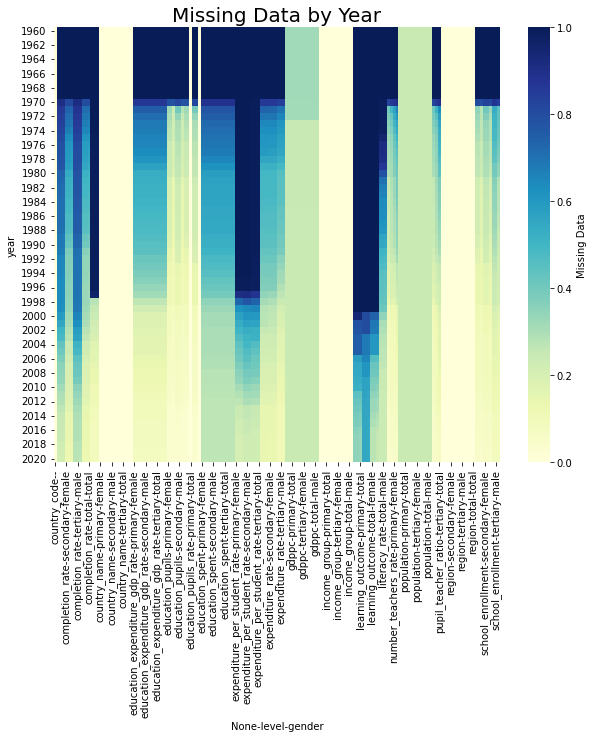

In [3]:
df = get_merged_data(from_year=1960, year_as_datetime=False, indexed=False)
years = df.year.copy()
df_isna = df.isna()
df_isna.year = years
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Missing Data by Year', size=20)
sns.heatmap(data=df_isna.groupby('year').mean(),
            cmap='YlGnBu',
            cbar_kws={'label': 'Missing Data'})
plt.show()

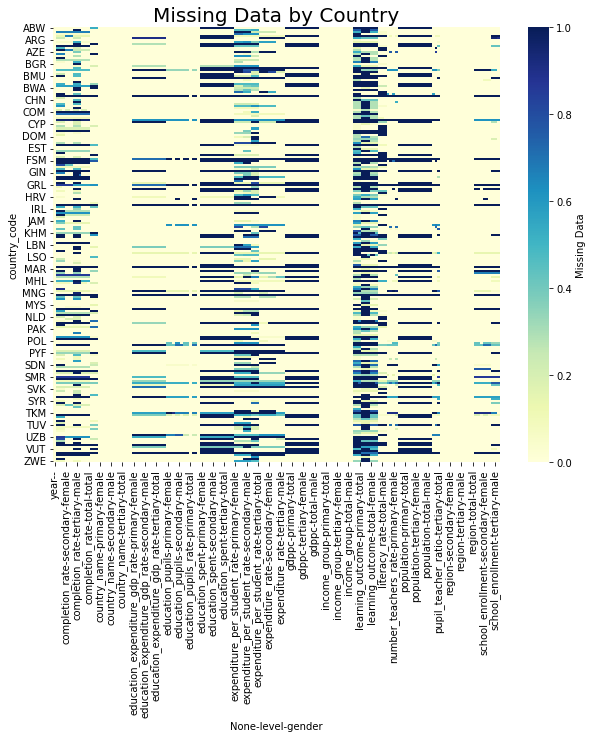

In [4]:
df = get_merged_data(from_year=2000, year_as_datetime=False, indexed=False)
country_codes = df.country_code.copy()
df_isna = df.isna()
df_isna.country_code = country_codes
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Missing Data by Country', size=20)
sns.heatmap(data=df_isna.groupby('country_code').mean(),
            cmap='YlGnBu',
            cbar_kws={'label': 'Missing Data'})
plt.show()

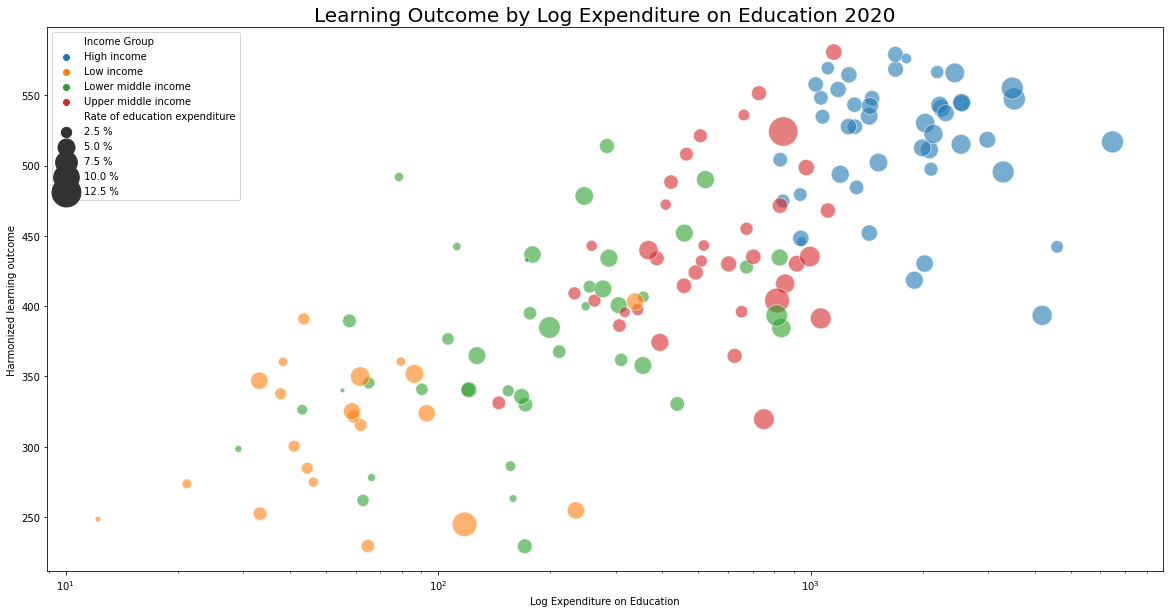

In [12]:
df = get_merged_data(year_as_datetime=False)
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Learning Outcome by Log Expenditure on Education 2020', size=20)
ax.set_xlabel('Log Expenditure on Education')
ax.set_xscale('log')
ax.set_ylabel('Harmonized learning outcome')
sns.scatterplot(
    data=df.xs(2020, level='year').xs(('total', 'total'), axis=1, level=('level', 'gender')),
    x='education_spent',
    y='learning_outcome',
    hue='income_group',
    size='education_expenditure_gdp_rate',
    alpha=0.6,
    sizes=(10, 1000))
handles, labels = ax.get_legend_handles_labels()
labels[0] = 'Income Group'
labels[5] = 'Rate of education expenditure'
labels[6:] = [name + ' %' for name in labels[6:]]
ax.legend(handles, labels)
plt.show()

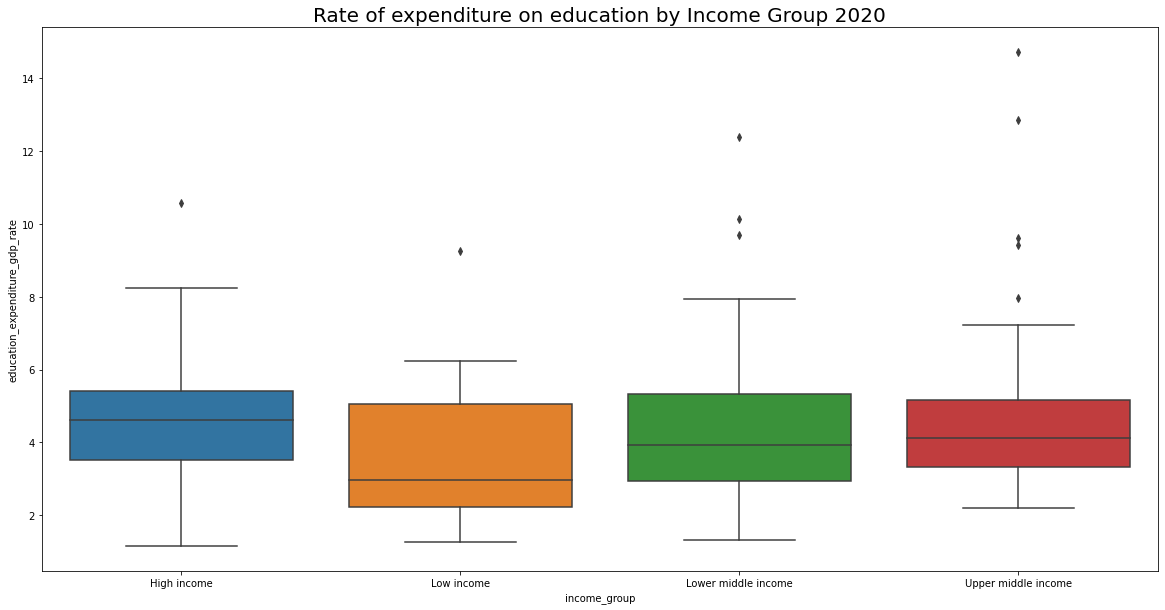

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Rate of expenditure on education by Income Group 2020', size=20)
ax.set_xlabel('Income Group')
ax.set_ylabel('Rate of education expenditure')
sns.boxplot(
    data=df.xs(2020, level='year').xs(('total', 'total'), axis=1, level=('level', 'gender')),
    x='income_group',
    y='education_expenditure_gdp_rate')
plt.show()

In [25]:
df.xs('total', axis=1, level='level')

completion_rate                        \
gender                     female       male      total   
country_code year                                         
ABW          2000       52.248716  56.500714  54.236834   
             2001       52.248716  56.500714  54.236834   
             2002       52.248716  56.500714  54.236834   
             2003       52.248716  56.500714  54.236834   
             2004       52.248716  56.500714  54.236834   
...                           ...        ...        ...   
ZWE          2016       44.496870  54.920202  49.200263   
             2017       48.832966  56.174923  52.268594   
             2018       48.832966  56.174923  52.268594   
             2019       48.832966  56.174923  52.268594   
             2020       48.832966  56.174923  52.268594   

                  compulsory_education_duration            country_name  \
gender                                   female male total       female   
country_code year                                                         
ABW          2000                           NaN  NaN   NaN        Aruba   
             2001                           NaN  NaN   NaN        Aruba   
             2002                           NaN  NaN   NaN        Aruba   
             2003                           NaN  NaN   NaN        Aruba   
             2004                           NaN  NaN   NaN        Aruba   
...                                         ...  ...   ...          ...   
ZWE          2016                           7.0  7.0   7.0     Zimbabwe   
             2017                           7.0  7.0   7.0     Zimbabwe   
             2018                           7.0  7.0   7.0     Zimbabwe   
             2019                           7.0  7.0   7.0     Zimbabwe   
             2020                           7.0  7.0   7.0     Zimbabwe   

                                      education_expenditure_gdp_rate  ...  \
gender                 male     total                         female  ...   
country_code year                                                     ...   
ABW          2000     Aruba     Aruba                        4.71468  ...   
             2001     Aruba     Aruba                        4.73986  ...   
             2002     Aruba     Aruba                        4.92365  ...   
             2003     Aruba     Aruba                        4.92365  ...   
             2004     Aruba     Aruba                        4.40848  ...   
...                     ...       ...                            ...  ...   
ZWE          2016  Zimbabwe  Zimbabwe                        5.47262  ...   
             2017  Zimbabwe  Zimbabwe                        5.38106  ...   
             2018  Zimbabwe  Zimbabwe                        3.58728  ...   
             2019  Zimbabwe  Zimbabwe                        3.58728  ...   
             2020  Zimbabwe  Zimbabwe                        3.58728  ...   

                  learning_outcome literacy_rate                        \
gender                       total        female       male      total   
country_code year                                                        
ABW          2000              NaN     97.071358  97.537399  97.291252   
             2001              NaN     97.071358  97.537399  97.291252   
             2002              NaN     97.071358  97.537399  97.291252   
             2003              NaN     97.071358  97.537399  97.291252   
             2004              NaN     97.071358  97.537399  97.291252   
...                            ...           ...        ...        ...   
ZWE          2016       389.554215     88.283829  89.185371  88.693420   
             2017       389.554215     88.283829  89.185371  88.693420   
             2018       389.554215     88.283829  89.185371  88.693420   
             2019       389.554215     88.283829  89.185371  88.693420   
             2020       389.554215     88.283829  89.185371  88.693420   

                    popu

ValueError: Could not interpret value `gender` for parameter `style`

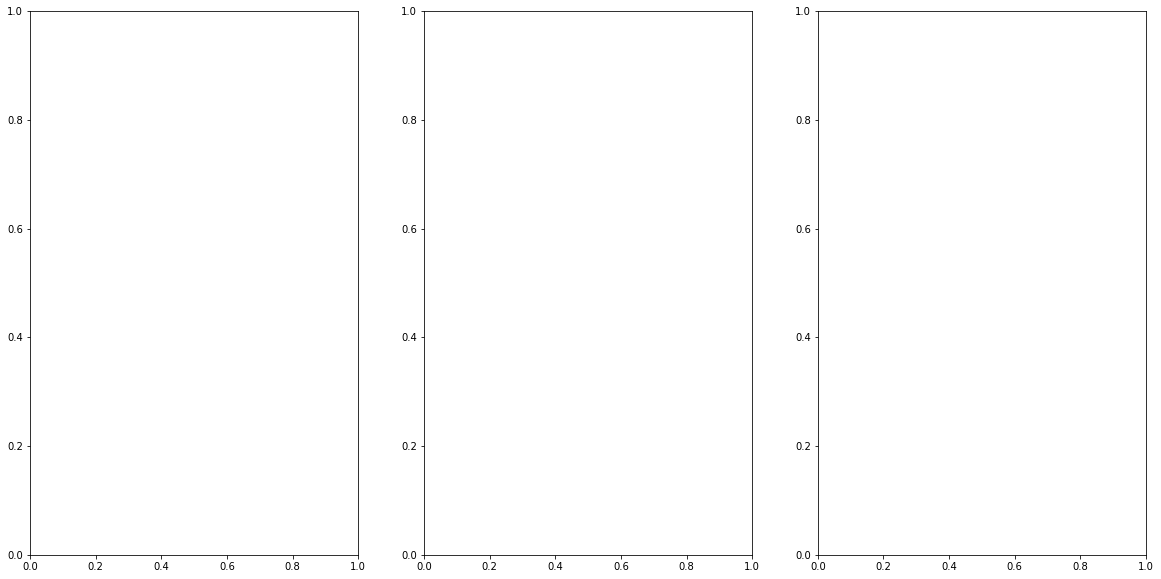

In [22]:
fig, axs = plt.subplots(figsize=(20, 10), ncols=3)
legend = False
for i, level in enumerate(['primary', 'secondary', 'tertiary']):
    if level == 'tertiary':
        legend='auto'
    sns.lineplot(
        #data=df.xs(2020, level='year').xs(('total', 'total'), axis=1, level=('level', 'gender')),
        #data=df[(df.level == level)].groupby(['year', 'income_group', 'gender']).mean().reset_index(),
        data=df.xs(level, axis=1, level='level').groupby(['year', 'income_group', 'gender']).mean().reset_index(),
        x='year',
        y='completion_rate',
        style='gender',
        hue='income_group',
        style_order=['total', 'female', 'male'],
        legend=legend,
        ax=axs[i])
    axs[i].set_title(f'{level.capitalize()} Completion Rate by Year', size=16)
    axs[i].set_ylim((0, 100))
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel(f'{level.capitalize()} Completion Rate')
    if legend:
        handles, labels = axs[i].get_legend_handles_labels()
        labels[0] = 'Income Group'
        labels[5] = 'Gender'
        axs[i].legend(handles, labels)
plt.show()

In [ ]:
geo_data = get_geo_data()
df = get_merged_data()
df = df[(df.level == 'total') & (df.gender == 'total') & (df.year == datetime(2020, 1, 1))].set_index('country_code').literacy_rate
geo_data = geo_data.join(df)
geo_source = GeoJSONDataSource(geojson=geo_data.to_json())

choropleth = figure(
    plot_width=900, 
    plot_height=500,
    toolbar_location=None,
    x_axis_location=None,
    y_axis_location=None)
choropleth.grid.visible = False
choropleth.title.text = 'Literacy Rate by Country'
choropleth.title.align = 'center'
choropleth.title.text_font_size = '20px'


color_mapper = LinearColorMapper(
    palette=list(reversed(Greens9)),
    low=0,
    high=100)

patches = Patches(
    xs="xs", ys="ys",
    fill_alpha=0.7, 
    fill_color={'field': 'literacy_rate', 'transform': color_mapper},
    line_color='white', 
    line_width=0.3)
choropleth.add_glyph(geo_source, patches)

color_bar = ColorBar(
    color_mapper=color_mapper,
    location="bottom_left", orientation="horizontal",
    title="Literacy Rate",
    title_text_font_size="14px", title_text_font_style="bold",
    background_fill_alpha=0.0)
choropleth.add_layout(color_bar)

show(choropleth)